In [1]:
# Basic set of Python Data Analysis
import numpy as np
import pandas as pd

## for plot by matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

from cycler import cycler
sns.set(font="DejaVu Sans", font_scale=1.8,
        rc={'figure.figsize':(10,10), 
            'lines.markersize':15, 
            "animation.embed_limit":100})
sns.mpl.rc("axes", prop_cycle=cycler('color',
        ['#E24A33', '#348ABD', '#988ED5', 
         '#777777', '#FBC15E', '#8EBA42',
         '#FFB5B8']))

## don't show warning
import warnings
warnings.filterwarnings('ignore')

In [23]:
## for machine learning with scikit learn
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

## for generate data
from sklearn.datasets import make_moons

## for evalute cluster
from sklearn import metrics
evalute = metrics.silhouette_score
# evalute = metrics.calinski_harabasz_score
# evalute = metrics.davies_bouldin_score

# Generate Data

In [15]:
data1  = np.random.randn(150,2)+[1,6]
label1 = 0*np.ones(len(data1))
data2  = np.random.randn(200,2)+[6,6]
label2 = np.ones(len(data2))
data3  = np.random.randn(250,2)+[3,1]
label3 = 2*np.ones(len(data3))
data  = np.concatenate((data1,data2,data3),axis = 0)
label = np.concatenate((label1,label2,label3),axis = 0)

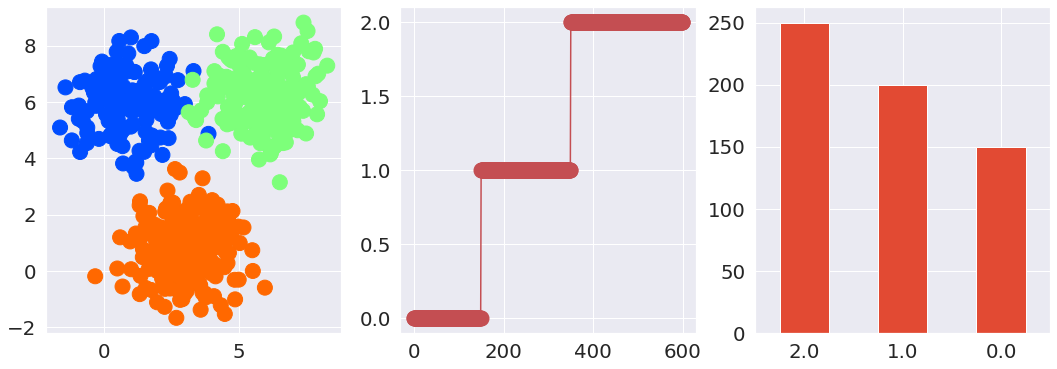

In [18]:
fig, axs = plt.subplots(1,3, figsize=(18,6)) 
delta = 0.6/(np.max(label) - np.min(label))
axs[0].scatter(data[:,0], data[:,1], marker='o', color=plt.get_cmap('jet')(label*delta+0.2))
axs[1].plot(label, 'ro-')
plt.subplot(133)
pd.value_counts(label).plot.bar(rot=0)

# Function

In [57]:
def clplot(score, cl, lab, data):
    # plot data
    plt.figure(22, figsize=(16, 16))
    ax = plt.subplot(221)
    score.plot(marker="o", ax=ax)
    
    plt.subplot(222)
    delta = 0.6/(np.max(cl) - np.min(cl))
    plt.scatter(data[:,0], data[:,1], marker='o', 
                color=plt.get_cmap('jet')((cl-np.min(cl))*delta+0.2))
    
    plt.subplot(223)
    plt.plot(cl, "ro-", label=lab)
    plt.legend()
    
    plt.subplot(224)
    pd.value_counts(cl).plot.bar(rot=0)

# KMeans

In [6]:
score_KMeans = pd.DataFrame(columns=["ncluster", "score"])
for n in np.arange(2,10):
    cl = KMeans(n_clusters=n,n_init=50).fit_predict(data)
    score_KMeans.loc[len(score_KMeans.index)] = [n, evalute(data, cl)]

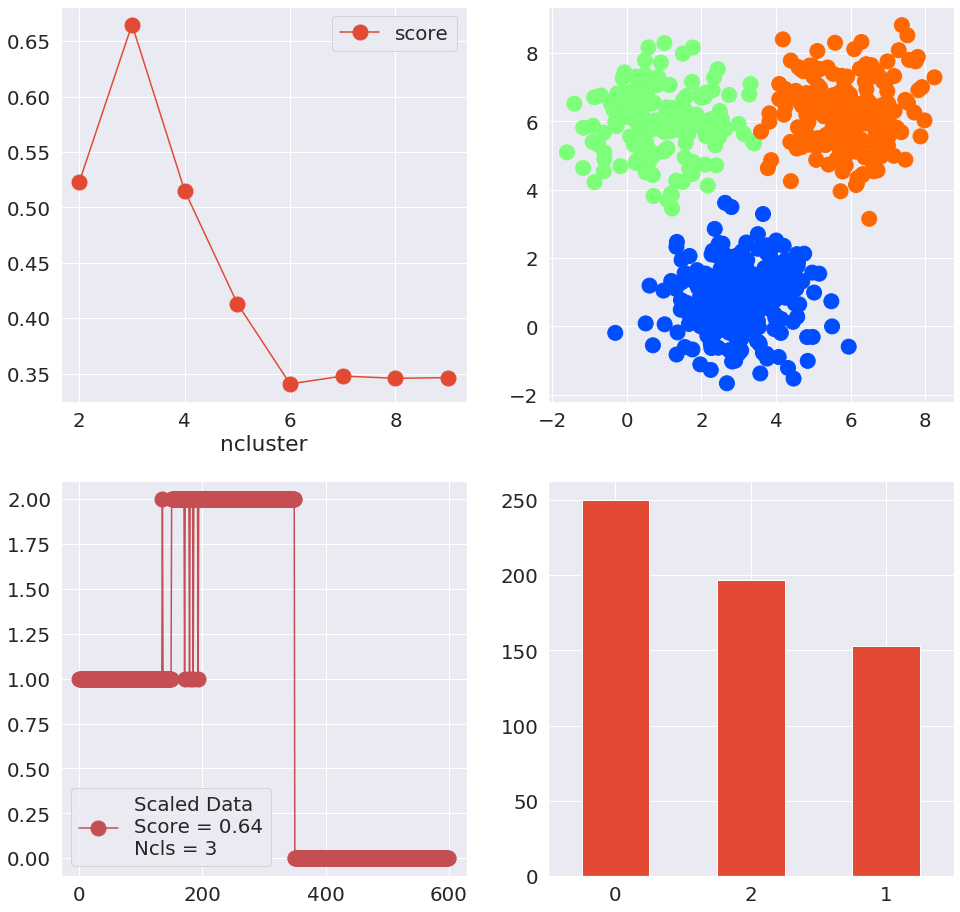

In [58]:
idxPeak = score_KMeans['score'].idxmax();
ncls = int(score_KMeans.loc[idxPeak,'ncluster'])
cl = KMeans(n_clusters=ncls, n_init=50).fit_predict(data)
lab = "Scaled Data\nScore = {:.2f}\nNcls = {:d}".format(evalute(data, cl), ncls)

## plot data
clplot(score_KMeans.set_index('ncluster'), cl, lab, data)

# SpectralClustering

In [8]:
score_Spectral = pd.DataFrame(columns=["gamma", "ncls", "score"])
for gamma in [0.1, 0.5, 1.0]:
    for ncls in np.arange(2,10):
        cl = SpectralClustering(n_clusters=ncls, gamma=gamma).fit_predict(data)
        score_Spectral.loc[len(score_Spectral.index)] = [gamma, ncls, evalute(data, cl)]

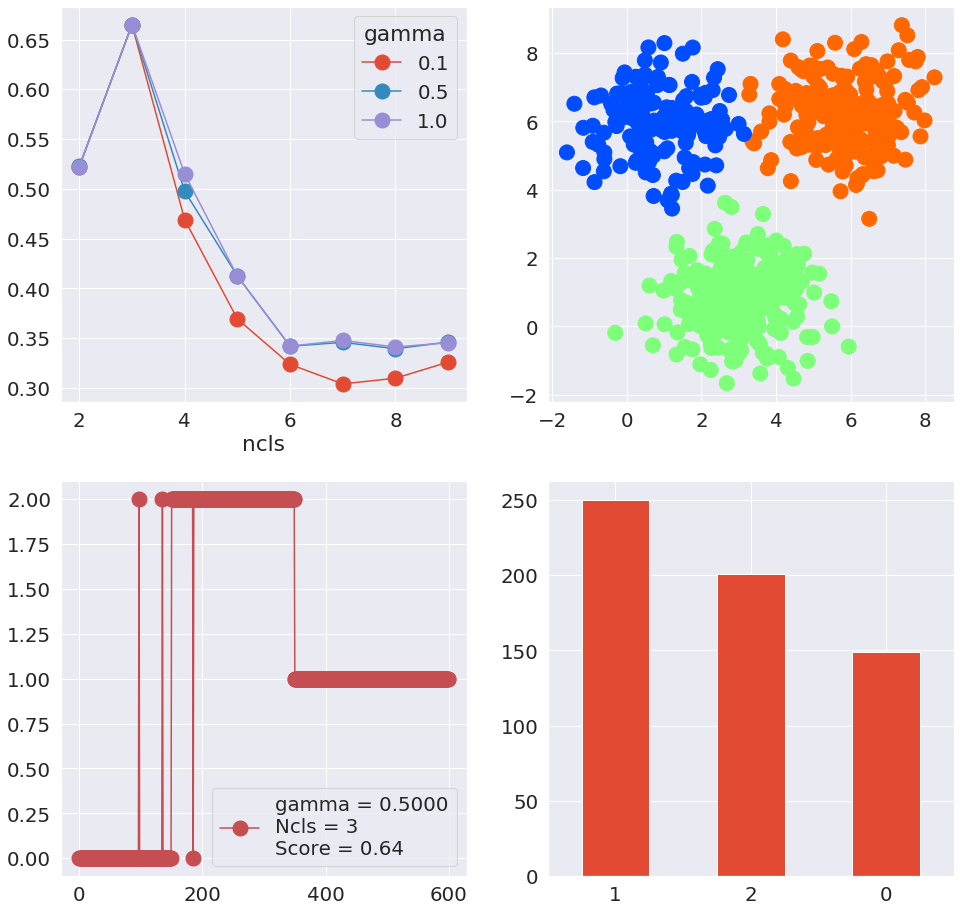

In [53]:
idxPeak = score_Spectral['score'].idxmax();
gamma   = score_Spectral.loc[idxPeak,"gamma"]
ncls    = score_Spectral.loc[idxPeak, "ncls"].astype(int)
cl  = SpectralClustering(n_clusters=ncls, gamma=gamma).fit_predict(data)
lab = "gamma = {:.4f}\nNcls = {:d}\nScore = {:.2f}".format(gamma, ncls, evalute(data, cl))

### plot data
clplot(score_Spectral.pivot(index='ncls', columns="gamma", values="score"), cl, lab, data)

# DBSCAN

In [33]:
score_DBSCAN = pd.DataFrame(columns=["cutoff", "Min Samples", "score"])
for f in [0.08, 0.1, 0.5]:
    for n in np.arange(2,5):
        cl = DBSCAN(eps=f, min_samples=n).fit_predict(data)
        if(np.max(cl) < 1):
            score_DBSCAN.loc[len(score_DBSCAN.index)] = [f, n, -1]
        else:
            score_DBSCAN.loc[len(score_DBSCAN.index)] = [f, n, evalute(data, cl)]

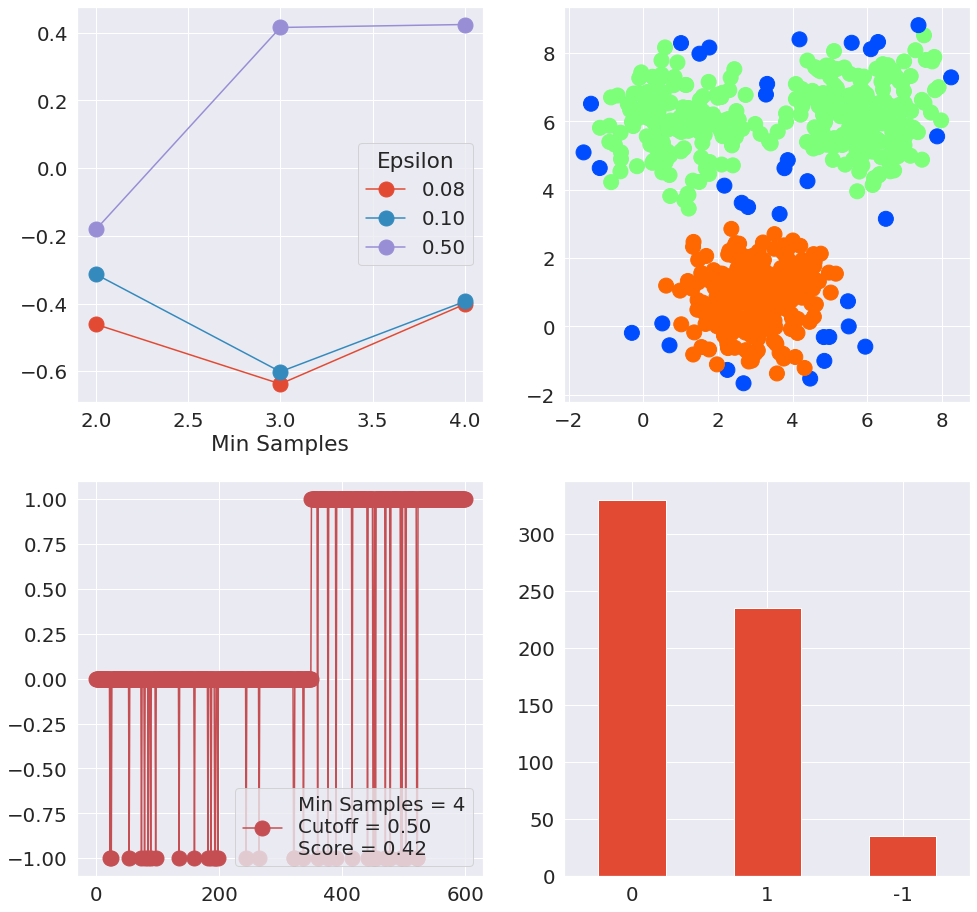

In [59]:
### the opt parameter
idxPeak = score_DBSCAN['score'].idxmax();
f  = score_DBSCAN.loc[idxPeak,"cutoff"]
n  = score_DBSCAN.loc[idxPeak, "Min Samples"].astype(int)
cl = DBSCAN(eps=f, min_samples=n).fit_predict(data)
lab = "Min Samples = {:d}\nCutoff = {:.2f}\nScore = {:.2f}".format(n, f, evalute(data, cl))

#### plot data
score_DBSCAN['Epsilon'] = score_DBSCAN['cutoff'].map(lambda x:('%.2f')%x)
clplot(score_DBSCAN.pivot(index='Min Samples', columns="Epsilon", values="score"), cl, lab, data)

# Moon data

In [25]:
X, y = make_moons(n_samples=1000, noise=0.05)

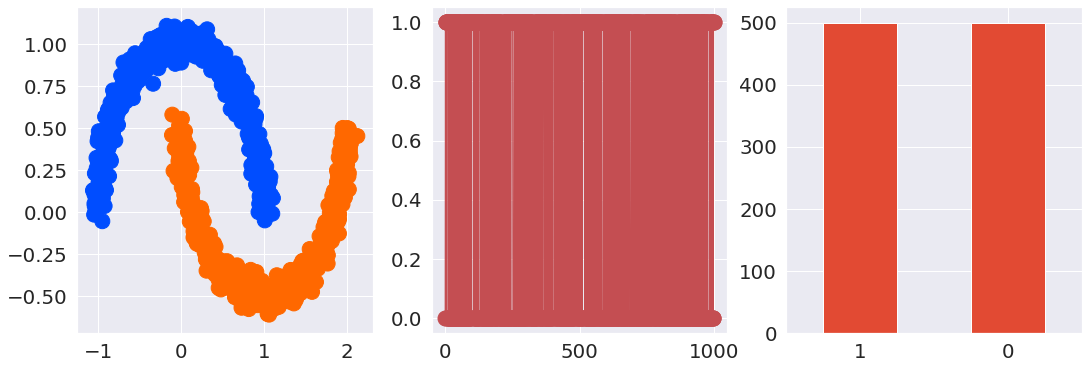

In [30]:
fig, axs = plt.subplots(1,3, figsize=(18,6)) 
delta = 0.6/(np.max(y) - np.min(y))
axs[0].scatter(X[:,0], X[:,1], marker='o', color=plt.get_cmap('jet')(y*delta+0.2))
axs[1].plot(y, 'ro-')
plt.subplot(133)
pd.value_counts(y).plot.bar(rot=0)

# DBSCAN

In [40]:
moon_DBSCAN = pd.DataFrame(columns=["eps", "Min Samples", "score"])
for f in [0.05, 0.1, 0.15, 0.2]:
    for n in np.arange(3,8):
        cl = DBSCAN(eps=f, min_samples=n).fit_predict(X)
        if(np.max(cl) < 1):
            moon_DBSCAN.loc[len(moon_DBSCAN.index)] = [f, n, -1]
        else:
            moon_DBSCAN.loc[len(moon_DBSCAN.index)] = [f, n, evalute(X, cl)]

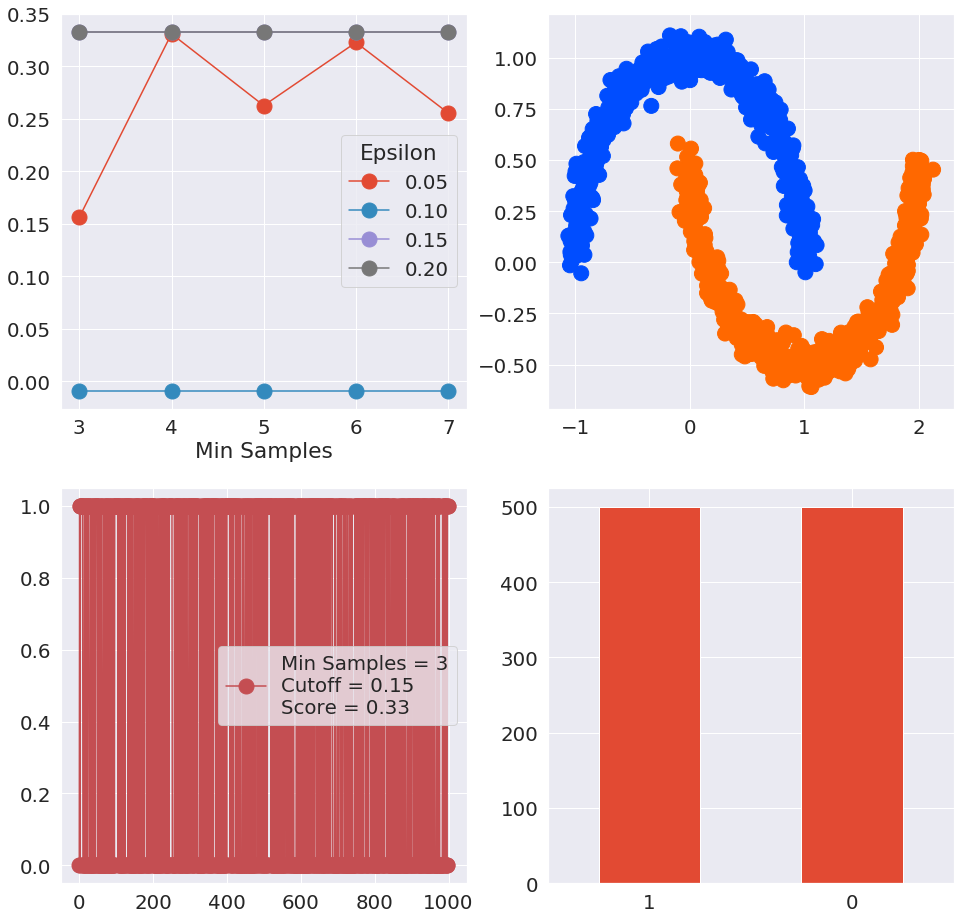

In [55]:
### the opt parameter
idxPeak = moon_DBSCAN['score'].idxmax();
f  = moon_DBSCAN.loc[idxPeak,"eps"]
n  = moon_DBSCAN.loc[idxPeak, "Min Samples"].astype(int)
cl = DBSCAN(eps=f, min_samples=n).fit_predict(X)
lab = "Min Samples = {:d}\nCutoff = {:.2f}\nScore = {:.2f}".format(n, f, evalute(X, cl))

#### plot data
moon_DBSCAN['Epsilon'] = moon_DBSCAN['eps'].map(lambda x:('%.2f')%x)
clplot(moon_DBSCAN.pivot(index='Min Samples', columns="Epsilon", values="score"), cl, lab, X)